In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
from google.colab import files
%matplotlib inline 

In [ ]:
#Загружаем данные
!wget https://github.com/Horea94/Fruit-Images-Dataset/archive/master.zip -O master.zip

--2023-03-12 20:47:20--  https://github.com/Horea94/Fruit-Images-Dataset/archive/master.zip
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/Horea94/Fruit-Images-Dataset/zip/refs/heads/master [following]
--2023-03-12 20:47:21--  https://codeload.github.com/Horea94/Fruit-Images-Dataset/zip/refs/heads/master
Resolving codeload.github.com (codeload.github.com)... 140.82.121.10
Connecting to codeload.github.com (codeload.github.com)|140.82.121.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [         <=>        ] 761.30M  24.5MB/s    in 41s     

2023-03-12 20:48:02 (18.7 MB/s) - ‘master.zip’ saved [798281939]



In [ ]:
#Распаковать архив
!unzip master.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: Fruit-Images-Dataset-master/Training/Tomato 3/148_100.jpg  
  inflating: Fruit-Images-Dataset-master/Training/Tomato 3/149_100.jpg  
  inflating: Fruit-Images-Dataset-master/Training/Tomato 3/150_100.jpg  
  inflating: Fruit-Images-Dataset-master/Training/Tomato 3/151_100.jpg  
  inflating: Fruit-Images-Dataset-master/Training/Tomato 3/152_100.jpg  
  inflating: Fruit-Images-Dataset-master/Training/Tomato 3/153_100.jpg  
  inflating: Fruit-Images-Dataset-master/Training/Tomato 3/154_100.jpg  
  inflating: Fruit-Images-Dataset-master/Training/Tomato 3/155_100.jpg  
  inflating: Fruit-Images-Dataset-master/Training/Tomato 3/156_100.jpg  
  inflating: Fruit-Images-Dataset-master/Training/Tomato 3/157_100.jpg  
  inflating: Fruit-Images-Dataset-master/Training/Tomato 3/158_100.jpg  
  inflating: Fruit-Images-Dataset-master/Training/Tomato 3/159_100.jpg  
  inflating: Fruit-Images-Dataset-master/Training/Tomato

In [ ]:
#Создаем Tensorflow Dataset
batch_size=256
image_size=(100, 100)

In [ ]:
#Набор данных для обучения
train_dataset = image_dataset_from_directory('Fruit-Images-Dataset-master/Training',
                                             subset='training',
                                             seed=42,
                                             validation_split=0.1,
                                             batch_size=batch_size,
                                             image_size=image_size)

Found 67692 files belonging to 131 classes.
Using 60923 files for training.


In [ ]:
#Проверочный набор данных
validation_dataset = image_dataset_from_directory('Fruit-Images-Dataset-master/Training',
                                             subset='validation',
                                             seed=42,
                                             validation_split=0.1,
                                             batch_size=batch_size,
                                             image_size=image_size)

Found 67692 files belonging to 131 classes.
Using 6769 files for validation.


In [ ]:
#Названия классов в наборах данных.
class_names = train_dataset.class_names
class_names

['Apple Braeburn',
 'Apple Crimson Snow',
 'Apple Golden 1',
 'Apple Golden 2',
 'Apple Golden 3',
 'Apple Granny Smith',
 'Apple Pink Lady',
 'Apple Red 1',
 'Apple Red 2',
 'Apple Red 3',
 'Apple Red Delicious',
 'Apple Red Yellow 1',
 'Apple Red Yellow 2',
 'Apricot',
 'Avocado',
 'Avocado ripe',
 'Banana',
 'Banana Lady Finger',
 'Banana Red',
 'Beetroot',
 'Blueberry',
 'Cactus fruit',
 'Cantaloupe 1',
 'Cantaloupe 2',
 'Carambula',
 'Cauliflower',
 'Cherry 1',
 'Cherry 2',
 'Cherry Rainier',
 'Cherry Wax Black',
 'Cherry Wax Red',
 'Cherry Wax Yellow',
 'Chestnut',
 'Clementine',
 'Cocos',
 'Corn',
 'Corn Husk',
 'Cucumber Ripe',
 'Cucumber Ripe 2',
 'Dates',
 'Eggplant',
 'Fig',
 'Ginger Root',
 'Granadilla',
 'Grape Blue',
 'Grape Pink',
 'Grape White',
 'Grape White 2',
 'Grape White 3',
 'Grape White 4',
 'Grapefruit Pink',
 'Grapefruit White',
 'Guava',
 'Hazelnut',
 'Huckleberry',
 'Kaki',
 'Kiwi',
 'Kohlrabi',
 'Kumquats',
 'Lemon',
 'Lemon Meyer',
 'Limes',
 'Lychee',
 'M

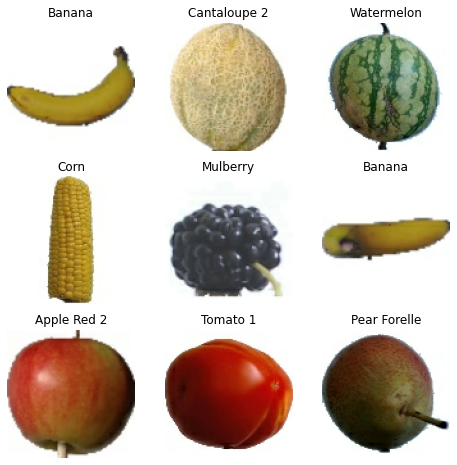

In [ ]:
#Примеры изображений
plt.figure(figsize=(8, 8))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
#Набор данных для тестирования
test_dataset = image_dataset_from_directory('Fruit-Images-Dataset-master/Test',
                                             batch_size=batch_size,
                                             image_size=image_size)

Found 22688 files belonging to 131 classes.


In [ ]:
#Названия классов в наборах данных для тестирование.
test_dataset.class_names

['Apple Braeburn',
 'Apple Crimson Snow',
 'Apple Golden 1',
 'Apple Golden 2',
 'Apple Golden 3',
 'Apple Granny Smith',
 'Apple Pink Lady',
 'Apple Red 1',
 'Apple Red 2',
 'Apple Red 3',
 'Apple Red Delicious',
 'Apple Red Yellow 1',
 'Apple Red Yellow 2',
 'Apricot',
 'Avocado',
 'Avocado ripe',
 'Banana',
 'Banana Lady Finger',
 'Banana Red',
 'Beetroot',
 'Blueberry',
 'Cactus fruit',
 'Cantaloupe 1',
 'Cantaloupe 2',
 'Carambula',
 'Cauliflower',
 'Cherry 1',
 'Cherry 2',
 'Cherry Rainier',
 'Cherry Wax Black',
 'Cherry Wax Red',
 'Cherry Wax Yellow',
 'Chestnut',
 'Clementine',
 'Cocos',
 'Corn',
 'Corn Husk',
 'Cucumber Ripe',
 'Cucumber Ripe 2',
 'Dates',
 'Eggplant',
 'Fig',
 'Ginger Root',
 'Granadilla',
 'Grape Blue',
 'Grape Pink',
 'Grape White',
 'Grape White 2',
 'Grape White 3',
 'Grape White 4',
 'Grapefruit Pink',
 'Grapefruit White',
 'Guava',
 'Hazelnut',
 'Huckleberry',
 'Kaki',
 'Kiwi',
 'Kohlrabi',
 'Kumquats',
 'Lemon',
 'Lemon Meyer',
 'Limes',
 'Lychee',
 'M

In [ ]:
#Настраиваем производительность TensorFlow DataSet
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [ ]:
#Создаем нейронную сеть
# Создаем последовательную модель
model = Sequential()
# Сверточный слой
model.add(Conv2D(16, (5, 5), padding='same', 
                 input_shape=(100, 100, 3), activation='relu'))
# Слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Сверточный слой
model.add(Conv2D(32, (5, 5), activation='relu', padding='same'))
# Слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Сверточный слой
model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
# Слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Сверточный слой
model.add(Conv2D(128, (5, 5), activation='relu', padding='same'))
# Слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Полносвязная часть нейронной сети для классификации
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
# Выходной слой, 131 нейрон по количеству классов
model.add(Dense(131, activation='softmax'))

In [ ]:
#Компилируем модель
model.compile(loss='sparse_categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])


In [ ]:
#Обучаем нейронную сеть
history = model.fit(train_dataset, 
                    validation_data=validation_dataset,
                    epochs=5,
                    verbose=2)

Epoch 1/5
238/238 - 33s - loss: 1.6075 - accuracy: 0.6975 - val_loss: 0.0181 - val_accuracy: 0.9960 - 33s/epoch - 141ms/step
Epoch 2/5
238/238 - 21s - loss: 0.0737 - accuracy: 0.9775 - val_loss: 0.0236 - val_accuracy: 0.9920 - 21s/epoch - 87ms/step
Epoch 3/5
238/238 - 22s - loss: 0.0432 - accuracy: 0.9866 - val_loss: 0.0159 - val_accuracy: 0.9960 - 22s/epoch - 94ms/step
Epoch 4/5
238/238 - 19s - loss: 0.0345 - accuracy: 0.9902 - val_loss: 0.0207 - val_accuracy: 0.9941 - 19s/epoch - 79ms/step
Epoch 5/5
238/238 - 21s - loss: 0.0312 - accuracy: 0.9903 - val_loss: 0.0476 - val_accuracy: 0.9817 - 21s/epoch - 90ms/step


In [ ]:
# Оцениваем качество обучения модели на тестовых данных
scores = model.evaluate(test_dataset, verbose=1)

89/89 [==============================] - 8s 87ms/step - loss: 0.4549 - accuracy: 0.9149


In [ ]:
print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

Доля верных ответов на тестовых данных, в процентах: 91.4933


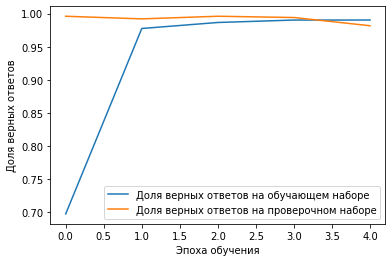

In [ ]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

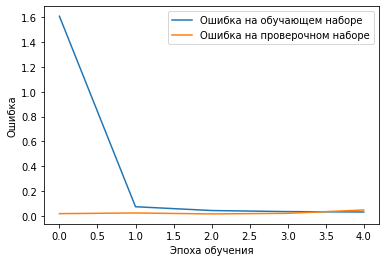

In [ ]:
plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [ ]:
#Сохраняем обученную нейронную сеть
model.save("fruits_360_model.h5")

In [ ]:
#Сохраняем модель на локальный компьютер
files.download("fruits_360_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>